<a href="https://colab.research.google.com/github/nihar-max/leanding_loan_club_defaulters_prediction/blob/master/%F0%9F%8F%A6_Lending_Club_Loan_%F0%9F%92%B0_Defaulters_%F0%9F%8F%83%E2%80%8D%E2%99%82_Prediction_Part_1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

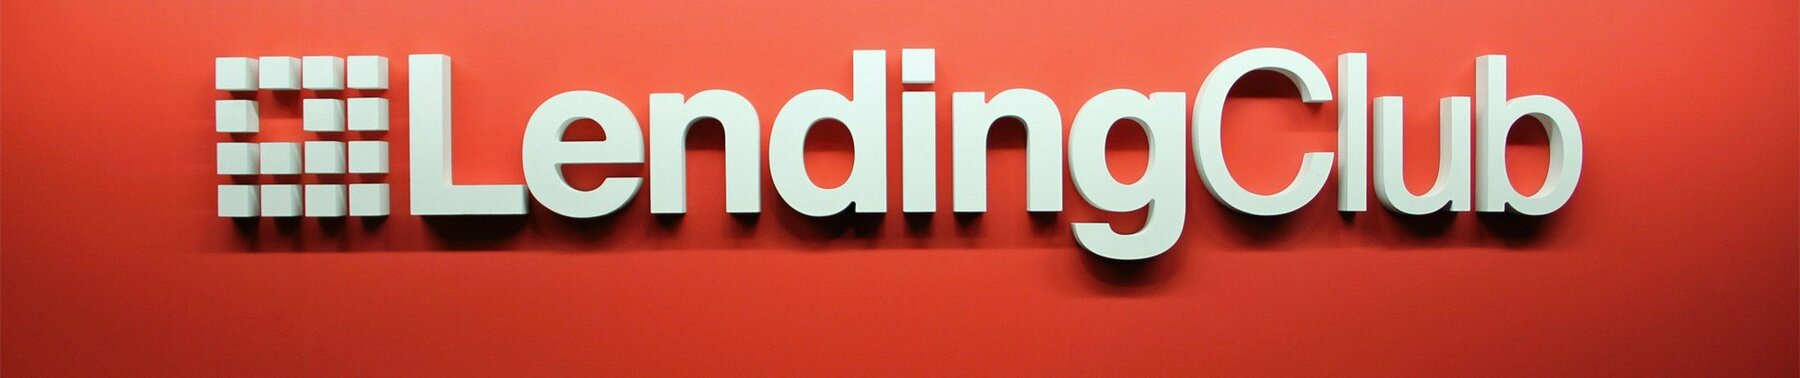

# 🏦 Lending Club Loan 💰 Defaulters 🏃‍♂ Prediction

### Introduction and Buisness understanding
LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.LendingClub is the world's largest peer-to-peer lending platform to offer loan trading on a secondary market.Solving this case study will give us an idea about how real business problems are solved using EDA and Machine Learning. In this case study, we will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

- Number of data points: 42,538<br>
- Attributes: 115<br>

### **Objective**:
To build classification model, which help in predicting wheatear  the person belongs to default category or not



<h2>1. Mapping the real-world problem to an ML problem</h2>

<h3>1.2 Type of Machine Learning Problem</h3>

<p>
    
            Task is to determine if person is defaulter or not => Classification problem
   
      
    
</p>

<h2>2. Reading Data</h2>
<h3> 2.1 Loading the data </h3>

The dataset is available in:
1. .csv file format

In order to load the data, We are using csv dataset with help of pandas library.
<br>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import  seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Using Pandas library to load dataset
path = '/content/drive/MyDrive/lending club loans/lending_club_loans.csv'
loan_df = pd.read_csv(path, skiprows=1,low_memory=False)

In [ ]:
print("Number of data points in our data:", loan_df.shape)
pd.set_option('display.max_columns', None)
loan_df.head(1)

Number of data points in our data: (42538, 115)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,Jan-2015,171.62,NaN,Sep-2016,744.0,740.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


2.2 Dependent variable

In [ ]:
loan_df['loan_status'].value_counts()

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

In [ ]:
loan_df = loan_df[loan_df['loan_status'] != 'Current']

loan_df['defaulters'] = np.where(loan_df['loan_status'] != 'Fully Paid' , 1, 0)


print(loan_df['defaulters'].value_counts())

loan_df = loan_df.drop(['loan_status'],axis = 1)

0    33586
1     8439
Name: defaulters, dtype: int64


<ipython-input-354-8a134d16b374>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df['defaulters'] = np.where(loan_df['loan_status'] != 'Fully Paid' , 1, 0)


<Axes: >

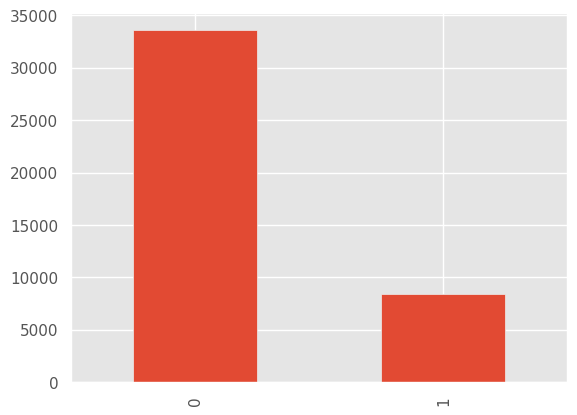

In [ ]:
loan_df.defaulters.value_counts().plot(kind = 'bar')

**Imbalanced Data**

## 3. Exploratory Data Analysis

### In Data Analysis What All Things We Do
- Missing Values
- Explore About the Numerical Variables
- Explore About categorical Variables
- Finding Relationship between feature



### 3.1 Missing Values

In [ ]:
#Let us capture all the nan values
# We have 115 features with many features with lots of null values so first we have to check features with high null values
features_nan = [feature for feature in loan_df.columns if loan_df[feature].isnull().sum()>=10000]
print("*"*50)
for feature in features_nan:
  print("{}: {}% missing values".format(feature,np.round(loan_df[feature].isnull().mean(),4)*100))
print("*"*50)
#print("Data type of those missing nan value features:")
#print(loan_df[features_nan].dtypes)


**************************************************
desc: 31.19% missing values
mths_since_last_delinq: 63.23% missing values
mths_since_last_record: 91.35% missing values
next_pymnt_d: 93.38% missing values
mths_since_last_major_derog: 100.0% missing values
annual_inc_joint: 100.0% missing values
dti_joint: 100.0% missing values
verification_status_joint: 100.0% missing values
tot_coll_amt: 100.0% missing values
tot_cur_bal: 100.0% missing values
open_acc_6m: 100.0% missing values
open_il_6m: 100.0% missing values
open_il_12m: 100.0% missing values
open_il_24m: 100.0% missing values
mths_since_rcnt_il: 100.0% missing values
total_bal_il: 100.0% missing values
il_util: 100.0% missing values
open_rv_12m: 100.0% missing values
open_rv_24m: 100.0% missing values
max_bal_bc: 100.0% missing values
all_util: 100.0% missing values
total_rev_hi_lim: 100.0% missing values
inq_fi: 100.0% missing values
total_cu_tl: 100.0% missing values
inq_last_12m: 100.0% missing values
acc_open_past_24mths: 10

**Observation** : We have filtered using 50% of data if any feature has null and there are almost many features having 100% missing values so in such case features having more than 60% of null values need to be dropped

In [ ]:
imp_features = [feature for feature in loan_df.columns if feature not in  features_nan ]
#imp_features

loan_df=loan_df[imp_features]

### 3.1.1 Features with less than 1% of missing values

In [ ]:
#Let us capture all the nan values
# We have 115 features with many features with lots of null values so first we have to check features with high null values
features_nan = [feature for feature in loan_df.columns if (loan_df[feature].isnull().sum() >= 1 and loan_df[feature].isnull().sum() < 50) ]
print("*"*50)
for feature in features_nan:
  print("{}: {}% missing values".format(feature,np.round(loan_df[feature].isnull().mean(),4)*100))
print("*"*50)
#print("Data type of those missing nan value features:")
#print(loan_df[features_nan].dtypes)


**************************************************
member_id: 0.01% missing values
loan_amnt: 0.01% missing values
funded_amnt: 0.01% missing values
funded_amnt_inv: 0.01% missing values
term: 0.01% missing values
int_rate: 0.01% missing values
installment: 0.01% missing values
grade: 0.01% missing values
sub_grade: 0.01% missing values
home_ownership: 0.01% missing values
annual_inc: 0.02% missing values
verification_status: 0.01% missing values
issue_d: 0.01% missing values
pymnt_plan: 0.01% missing values
url: 0.01% missing values
purpose: 0.01% missing values
title: 0.04% missing values
zip_code: 0.01% missing values
addr_state: 0.01% missing values
dti: 0.01% missing values
delinq_2yrs: 0.08% missing values
earliest_cr_line: 0.08% missing values
fico_range_low: 0.01% missing values
fico_range_high: 0.01% missing values
inq_last_6mths: 0.08% missing values
open_acc: 0.08% missing values
pub_rec: 0.08% missing values
revol_bal: 0.01% missing values
total_acc: 0.08% missing values
in

**Analysis**: Even after dropping features with 50% + null values, still there are many missing values, now will handle features with less than 10% of missing values

### Handle Numeric variable with less than 1% of missing values using Mean imputation

In [ ]:
less_missing_value_df =loan_df[features_nan]

numeric_features = [feature for feature in less_missing_value_df.columns if less_missing_value_df[feature].dtypes != 'O']

loan_df_num =loan_df[numeric_features]

loan_df_num = loan_df_num.fillna(loan_df_num.mean())

### Handle Categorical variable with less than 1% of missing values using Most recent category imputation

In [ ]:
less_missing_value_df =loan_df[features_nan]

cat_features = [feature for feature in less_missing_value_df.columns if less_missing_value_df[feature].dtypes == 'O']

In [ ]:

loan_df_cat =loan_df[cat_features]

loan_df_cat.head(1)

,term,int_rate,grade,sub_grade,home_ownership,verification_status,issue_d,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_credit_pull_d,application_type
0,36 months,10.65%,B,B2,RENT,Verified,Dec-2011,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,Jan-1985,f,Sep-2016,INDIVIDUAL


In [ ]:
for i in loan_df_cat:
    loan_df_cat[i].fillna(loan_df_cat[i].mode()[0], inplace=True)

<ipython-input-362-ef647be5198b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df_cat[i].fillna(loan_df_cat[i].mode()[0], inplace=True)
<ipython-input-362-ef647be5198b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df_cat[i].fillna(loan_df_cat[i].mode()[0], inplace=True)
<ipython-input-362-ef647be5198b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df_cat[i].fillna(loan_df_cat[i].mode()[0], inplace=True)
<ipytho

In [ ]:
loan_df_cat.isnull().sum()

term                   0
int_rate               0
grade                  0
sub_grade              0
home_ownership         0
verification_status    0
issue_d                0
pymnt_plan             0
url                    0
purpose                0
title                  0
zip_code               0
addr_state             0
earliest_cr_line       0
initial_list_status    0
last_credit_pull_d     0
application_type       0
dtype: int64

### 3.1.2 Remaining Null value features

In [ ]:
#Let us capture all the nan values
# We have 115 features with many features with lots of null values so first we have to check features with high null values
features_nan = [feature for feature in loan_df.columns if loan_df[feature].isnull().sum() > 50 ]
print("*"*50)
for feature in features_nan:
  print("{}: {}% missing values".format(feature,np.round(loan_df[feature].isnull().mean(),4)*100))
print("*"*50)
#print("Data type of those missing nan value features:")
print(loan_df[features_nan].dtypes)


**************************************************
emp_title: 6.17% missing values
emp_length: 2.6100000000000003% missing values
revol_util: 0.22% missing values
last_pymnt_d: 0.2% missing values
collections_12_mths_ex_med: 0.35000000000000003% missing values
chargeoff_within_12_mths: 0.35000000000000003% missing values
pub_rec_bankruptcies: 3.26% missing values
tax_liens: 0.26% missing values
**************************************************
emp_title                      object
emp_length                     object
revol_util                     object
last_pymnt_d                   object
collections_12_mths_ex_med    float64
chargeoff_within_12_mths      float64
pub_rec_bankruptcies          float64
tax_liens                     float64
dtype: object


In [ ]:
loan_df[features_nan].head(2)

,emp_title,emp_length,revol_util,last_pymnt_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,NaN,10+ years,83.7%,Jan-2015,0.0,0.0,0.0,0.0
1,Ryder,< 1 year,9.4%,Apr-2013,0.0,0.0,0.0,0.0


In [ ]:
feat_high_nan =loan_df[features_nan]
y = loan_df['defaulters']

data = pd.concat([loan_df_num, loan_df_cat,feat_high_nan,y], axis=1)

#### 1. Mean/ Median /Mode imputation in pub_rec_bankruptcies variable

Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [ ]:
print('Sum of total values in collections_12_mths_ex_med:',data['collections_12_mths_ex_med'].sum())
print('Sum of total values in chargeoff_within_12_mths:',data['chargeoff_within_12_mths'].sum())
print('Sum of total values in pub_rec_bankruptcies:',data['pub_rec_bankruptcies'].sum())
print('Sum of total values in tax_liens:',data['tax_liens'].sum())

Sum of total values in collections_12_mths_ex_med: 0.0
Sum of total values in chargeoff_within_12_mths: 0.0
Sum of total values in pub_rec_bankruptcies: 1847.0
Sum of total values in tax_liens: 1.0


Out of 3 variables only 1 variable is having some values rest all we can drop

In [ ]:
data.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'],axis = 1,inplace = True)

In [ ]:
def impute_nan(data,variable,pub_rec_bankruptcies):
    data[variable+"_mean"]=data[variable].fillna(pub_rec_bankruptcies)

In [ ]:
mean_pub_rec_bankruptcies=data.pub_rec_bankruptcies.mean()
mean_pub_rec_bankruptcies

0.04542883144353986

In [ ]:
impute_nan(data,'pub_rec_bankruptcies',mean_pub_rec_bankruptcies)

In [ ]:
# Std deviation
print(data['pub_rec_bankruptcies'].std())
print(data['pub_rec_bankruptcies_mean'].std())

0.20895281461806361
0.20552367426993096


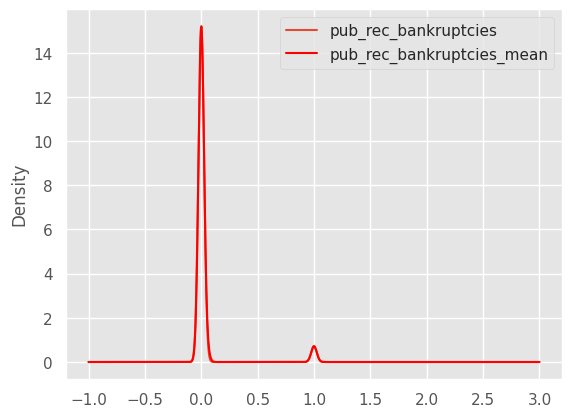

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['pub_rec_bankruptcies'].plot(kind='kde', ax=ax)
data.pub_rec_bankruptcies_mean.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### 2. End of distribution imputataion for pub_rec_bankruptcies feature.




In [ ]:
print('Mean for pub_rec_bankruptcies:                                ',data.pub_rec_bankruptcies.mean())
print('End of distribution for Comments with 3rd std dev:',data.pub_rec_bankruptcies.mean()+3*data.pub_rec_bankruptcies.std())
extreme=data.pub_rec_bankruptcies.mean()+3*data.pub_rec_bankruptcies.std()

Mean for pub_rec_bankruptcies:                                 0.04542883144353986
End of distribution for Comments with 3rd std dev: 0.6722872752977307


In [ ]:
def impute_nan(data,variable,extreme):
    data[variable+"_end_distribution"]=data[variable].fillna(extreme)

In [ ]:
impute_nan(data,'pub_rec_bankruptcies',extreme)

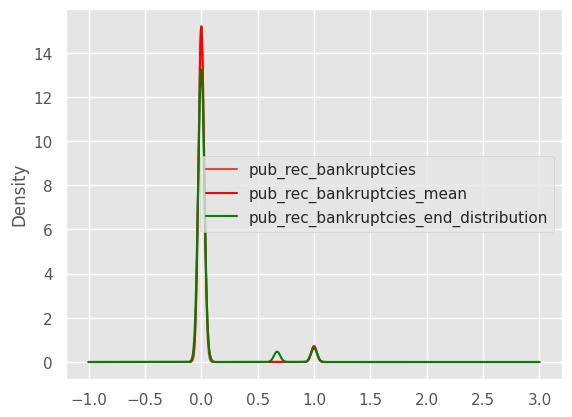

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
data['pub_rec_bankruptcies'].plot(kind='kde', ax=ax)
data.pub_rec_bankruptcies_mean.plot(kind='kde', ax=ax, color='red')
data.pub_rec_bankruptcies_end_distribution.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Handle Categorical Missing value features

- Emp_length

In [ ]:
data['emp_length_'] = np.where(data['emp_length']== '< 1 year','<=1 year',data['emp_length'])
data['emp_length_'] = np.where(data['emp_length_']== '1 year','<=1 year',data['emp_length_'])

In [ ]:
data=data.drop('emp_length',axis = 1)
data = data.drop('pub_rec_bankruptcies',axis = 1)

In [ ]:
data['emp_length_'].fillna('missing', inplace=True)

In [ ]:
data['emp_length_'].value_counts()

10+ years    9199
<=1 year     8596
2 years      4701
3 years      4322
4 years      3604
5 years      3423
6 years      2347
7 years      1843
8 years      1566
9 years      1328
missing      1096
Name: emp_length_, dtype: int64

####  emp_title



In [ ]:
data['emp_title'].value_counts().nlargest(30)

US Army                    139
Bank of America            115
IBM                         72
Kaiser Permanente           61
AT&T                        59
UPS                         57
Wells Fargo                 56
USAF                        55
US Air Force                55
Self Employed               49
United States Air Force     48
Walmart                     47
Lockheed Martin             46
State of California         43
Verizon Wireless            43
U.S. Army                   42
USPS                        41
Walgreens                   41
US ARMY                     40
Self                        39
JP Morgan Chase             38
Best Buy                    38
Target                      38
JPMorgan Chase              38
Department of Defense       37
US Navy                     36
Booz Allen Hamilton         34
Verizon                     34
Northrop Grumman            34
United States Army          34
Name: emp_title, dtype: int64

**Observation**: Once category with same name are allocated diffrently due to upper&lower cases, so have to treat those into same category

In [ ]:
data['emp_title_']=data['emp_title'].str.lower()
data['emp_title_'].replace(regex=True, inplace=True, to_replace=r'[0-9.\-]', value=r'')

replacement = {
    "united states": "us",
    "selfemployed": "self",
    "america": "us",
    "usaf": "us air force",
    "jpmorgan": "jp morgan",
    "wells fargo bank": "wells fargo",
    "bank of us":"us bank"
}
data['emp_title_']=data['emp_title_'].replace(replacement, regex=True)

data['emp_title_'].fillna('missing title', inplace=True)

In [ ]:
data['emp_title_'].value_counts()

missing title             2592
us army                    306
us air force               184
bank of us                 145
self                       111
                          ... 
the baker group              1
kohls department store       1
pem transportation           1
pgal                         1
homemaker                    1
Name: emp_title_, Length: 28521, dtype: int64

Still there are some category which need to be handled e.g. United States and US are same but allocated diffently

In [ ]:
data.drop('emp_title',axis = 1 ,inplace = True )

#### Revol Util

In [ ]:
data['revol_util'].value_counts()

0%        1063
40.7%       65
0.2%        64
63%         63
0.1%        61
          ... 
21.59%       1
39.95%       1
0.01%        1
17.67%       1
105.7%       1
Name: revol_util, Length: 1119, dtype: int64

There are around 1000+ unique categories in % form we have to convert it to ranges of % to make it more simpliied

In [ ]:
data['revol_util'].replace(regex=True, inplace=True, to_replace=r'[%]', value=r'')

data['revol_util'] = data['revol_util'].astype(float)

conditions = [
    (data['revol_util'] == 0.00),
    (data['revol_util'] > 0.00) & (data['revol_util'] <= 1),
    (data['revol_util'] > 1) & (data['revol_util'] <= 10),
    (data['revol_util'] > 10) & (data['revol_util'] <=20),
    (data['revol_util'] > 20) & (data['revol_util'] <=30),
    (data['revol_util']> 30) & (data['revol_util'] <=40),
    (data['revol_util'] > 40) & (data['revol_util'] <= 50),
    (data['revol_util'] > 50) & (data['revol_util'] <=60),
    (data['revol_util'] > 60) & (data['revol_util'] <=70),
    (data['revol_util']> 70) & (data['revol_util'] <=80),
    (data['revol_util'] > 80) & (data['revol_util'] <= 90),
    (data['revol_util'] > 90) & (data['revol_util'] <=100),
    (data['revol_util'] > 100)
]

results = ['0%', '>1%','0.1%-10%', '11%-20%', '21%-30%','31-40%', '41%-50%', '51%-60%', '61%-70%','71%-80%','81-90%', '91%-100%','<100%']


data['revol_util%'] = np.select(conditions, results)

data['revol_util%']=data['revol_util%'].replace('0', '0%')
# Replacing all null with 0% as this has no evidence


In [ ]:
data.drop('revol_util',axis = 1 ,inplace = True )

In [ ]:
data['revol_util%'].value_counts().nlargest(14)

51%-60%     4579
41%-50%     4568
61%-70%     4502
31-40%      4352
71%-80%     4276
21%-30%     4004
81-90%      3949
11%-20%     3547
91%-100%    3376
0.1%-10%    3196
0%          1156
>1%          493
<100%         27
Name: revol_util%, dtype: int64

### last_pymnt_d

In [ ]:
data.last_pymnt_d.value_counts().nlargest()

Mar-2013    1070
Dec-2014     949
May-2013     943
Feb-2013     906
Mar-2012     893
Name: last_pymnt_d, dtype: int64

Total 106 categories can be reduced if we seprate them by year and month feature

In [ ]:
data['last_pymnt_m']=data.last_pymnt_d.str.split('-').str[0]
data['last_pymnt_y']=data.last_pymnt_d.str.split('-').str[1]


data["last_pymnt_y"] = data['last_pymnt_y']
data["last_pymnt_m"] = data['last_pymnt_m']


def impute_nan(data,variable):
    most_frequent_category=data[variable].mode()[0]
    data[variable].fillna(most_frequent_category,inplace=True)


for feature in ['last_pymnt_y','last_pymnt_m']:
    impute_nan(data,feature)

In [ ]:
data.drop('last_pymnt_d',axis = 1 ,inplace = True )

**Observation** : Such that all Missing features has been handled by using various techniques

In [ ]:
data.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
       'policy_code', 'acc_now_delinq', 'delinq_amnt', 'term', 'int_rate',
       'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_credit_pull_d', 'application_type', 'defaulters',
       'pub_rec_bankruptcies_mean', 'pub_rec_bankruptcies_end_distribution',
       'emp_length_', 'emp_title_', 'revol_util%', 'last_pymnt_m',
       'last_pymnt_y

## 3.2 Categorical Data Analysis

In [ ]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']

for feature in categorical_features:
    print('Unique categorical values in each feature are :',feature,'=',len(data[feature].unique()))

Unique categorical values in each feature are : term = 2
Unique categorical values in each feature are : int_rate = 394
Unique categorical values in each feature are : grade = 7
Unique categorical values in each feature are : sub_grade = 35
Unique categorical values in each feature are : home_ownership = 5
Unique categorical values in each feature are : verification_status = 3
Unique categorical values in each feature are : issue_d = 55
Unique categorical values in each feature are : pymnt_plan = 2
Unique categorical values in each feature are : url = 42022
Unique categorical values in each feature are : purpose = 14
Unique categorical values in each feature are : title = 21140
Unique categorical values in each feature are : zip_code = 837
Unique categorical values in each feature are : addr_state = 50
Unique categorical values in each feature are : earliest_cr_line = 530
Unique categorical values in each feature are : initial_list_status = 1
Unique categorical values in each feature a

#### Handle Int_rate i.e Interest rate on Loan feature
- Intrest rate can also be presented without decimal to get summary of client.

In [ ]:
data['int_rate'].value_counts().nlargest()

 10.99%    972
 11.49%    836
 13.49%    800
  7.51%    787
  7.88%    742
Name: int_rate, dtype: int64

In [ ]:
data['int_rate'].replace(regex=True, inplace=True, to_replace=r'[%]', value=r'')

data['int_rate'] = data['int_rate'].astype(float)

conditions = [
    (data['int_rate'] > 0.00) & (data['int_rate'] <= 6),
    (data['int_rate'] > 6) & (data['int_rate'] <= 7),
    (data['int_rate'] > 7) & (data['int_rate'] <=8),
    (data['int_rate'] > 8) & (data['int_rate'] <=9),
    (data['int_rate']> 9) & (data['int_rate'] <=10),
    (data['int_rate'] > 10) & (data['int_rate'] <= 11),
    (data['int_rate'] > 11) & (data['int_rate'] <=12),
    (data['int_rate'] > 12) & (data['int_rate'] <=13),
    (data['int_rate']> 13) & (data['int_rate'] <=14),
    (data['int_rate'] > 14) & (data['int_rate'] <= 15),
    (data['int_rate'] > 15) & (data['int_rate'] <=16),
    (data['int_rate'] > 16) & (data['int_rate'] <=17),
    (data['int_rate'] > 17) & (data['int_rate'] <=18),
    (data['int_rate'] > 18)
]

results = ['5-6%', '7%','8%', '9%', '10%','11%', '12%', '13%', '14%','15%','16%','17%','18%','<18%']


data['int_rate'] = np.select(conditions, results)

<Axes: >

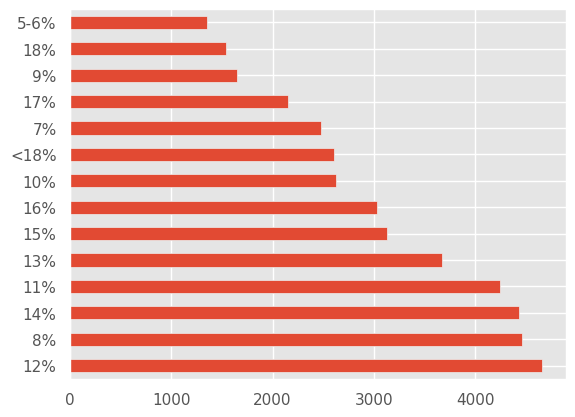

In [ ]:
CountStatus = pd.value_counts(data['int_rate'].values, sort=True)
CountStatus.plot.barh()

Analysis:
- We have succesfully reduced 394 unique categories to meaningful 14 unique categories.
- Lending club bank seems to have higher interest rates on customers for loan where 11-15% of Interest rates contains 50% of our data

### Grade V/S sub grade V/S Interest rate feature

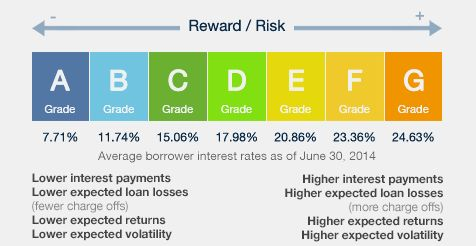

This means that Grade , Sub-grade & Int_rate will be imp here i.e. <=17% interest rate will fall under G grade and 5-8% will be under A grade

In [ ]:
data[['grade','sub_grade','int_rate','defaulters']][data['sub_grade']== 'G4'].sample(6)

,grade,sub_grade,int_rate,defaulters
25735,G,G4,<18%,0
23883,G,G4,<18%,0
40903,G,G4,<18%,1
22018,G,G4,<18%,0
42037,G,G4,<18%,1
23371,G,G4,<18%,1


In [ ]:
data[['grade','sub_grade','int_rate','defaulters']][data['sub_grade']== 'A1'].sample(6)

,grade,sub_grade,int_rate,defaulters
23900,A,A1,5-6%,0
16309,A,A1,5-6%,0
3300,A,A1,7%,0
2999,A,A1,7%,0
1410,A,A1,7%,0
17,A,A1,7%,0


**Analysis**: It seems to be most of the people with higher interest rates tend to fall under defaulter category

### 3.2.1 Univariate Analysis on State Address title using CDF
- Q.How many categories are there and How they are distributed?

In [ ]:
unique_addr = data["addr_state"].value_counts()
print('Unique data points:',unique_addr.shape)
print('unique_addr top 5:')
#Print Top 5
print(unique_addr.head(5))
print('unique_addr Last 5')
print(unique_addr.tail(5))

Unique data points: (50,)
unique_addr top 5:
CA    7360
NY    4013
FL    3067
TX    2882
NJ    1964
Name: addr_state, dtype: int64
unique_addr Last 5
IN    19
IA    12
NE    11
ID     9
ME     3
Name: addr_state, dtype: int64


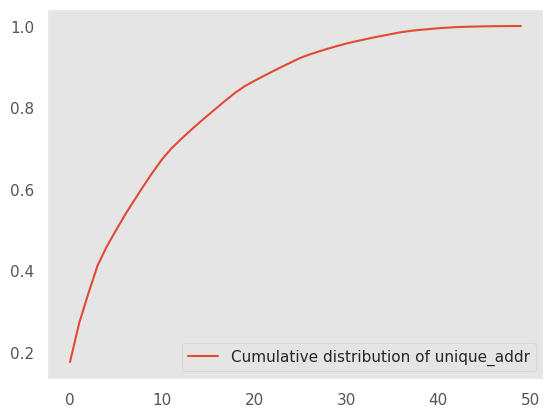

In [ ]:
s = sum(unique_addr.values)
h = unique_addr.values/s
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of unique_addr')
plt.grid()
plt.legend()
plt.show()

**Observation**: Out of 50 unique States only top 15 consist more than 80% of data and rest only 20%

### 3.2.2 Univariate Analysis on Verfication Status

In [ ]:
verification_status = data["verification_status"].value_counts()
print('Unique data points:',verification_status.shape)
print('verification_status top 5:')
#Print Top 5
print(verification_status.head(5))

print('**********************')
print("Souce verified and verified are same so merge it")

Unique data points: (3,)
verification_status top 5:
Not Verified       18682
Verified           13176
Source Verified    10167
Name: verification_status, dtype: int64
**********************
Souce verified and verified are same so merge it


In [ ]:
conditions = [
    (data['verification_status'] ==  'Not Verified'),
    (data['verification_status'] ==  'Verified'),
    (data['verification_status'] ==  'Source Verified')
]

results = ['Not Verified', 'Verified','Verified']


data['verification_status'] = np.select(conditions, results)

<Axes: >

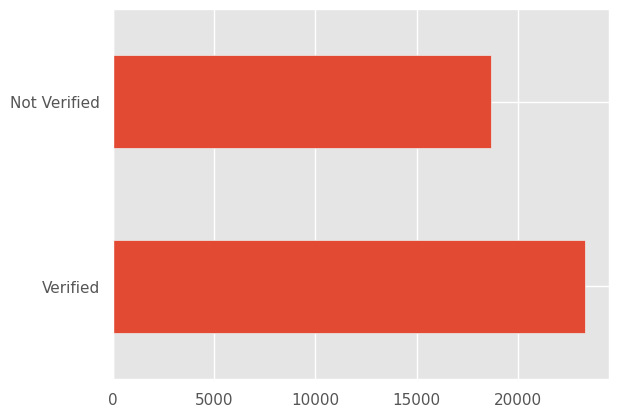

In [ ]:
CountStatus = pd.value_counts(data['verification_status'].values, sort=True)
CountStatus.plot.barh()

**Observation** : People who are not verified may fall under Defaulter category so further we have to understand if Source not verified is having any linear relationship with Defaulters or not

## 3.2.2 Bivariate Analysis for Categorical variables using Crosstab

### 1. Verification V/S Defaulters

In [ ]:
default_testing = data[data.defaulters == 1]

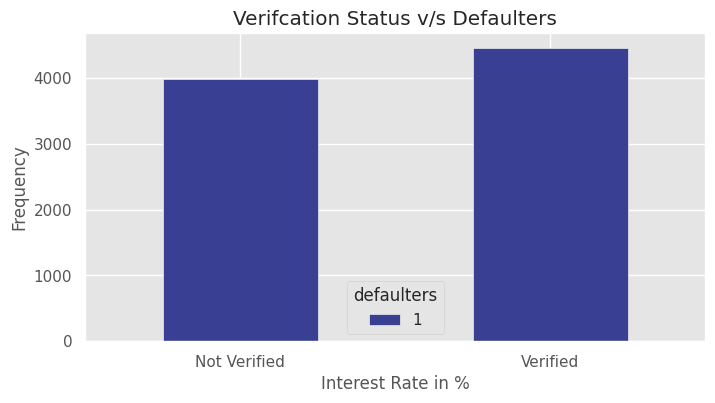

In [ ]:
pd.crosstab(default_testing.verification_status  ,default_testing.defaulters ).plot(kind="bar", stacked=True, figsize=(8,4), color=['#393f93'])
plt.title('Verifcation Status v/s Defaulters')
plt.xlabel('Interest Rate in %')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

**Obs** : 1. Out of 18k Not verified, 4000 falls under defaulters. 2.Out of 23k Verfied, 4300 falls under defaulters. So both categories fall under defaulter category so we can't be 100% sure that there is linear relationship b/w Verification Status &  Defaulters

### 2. Interest Rate V/S Month Term

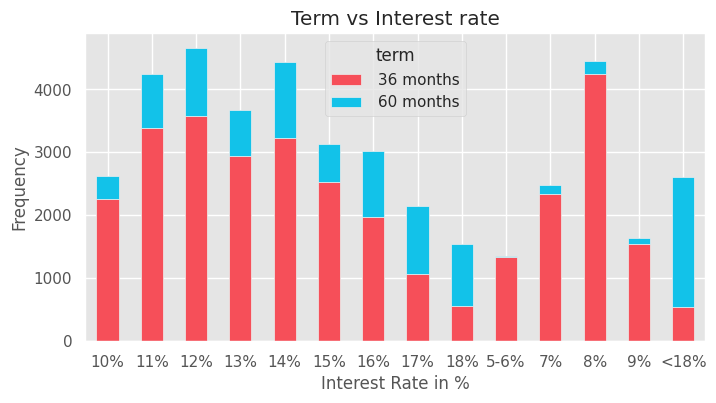

In [ ]:
pd.crosstab(data.int_rate ,data.term ).plot(kind="bar", stacked=True, figsize=(8,4), color=['#f64f59','#12c2e9'])
plt.title('Term vs Interest rate')
plt.xlabel('Interest Rate in %')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

**Obs**: People with higher Interest rate tends to have 60 months term instead of 36

### 3. Defaulters v/s Interest rate

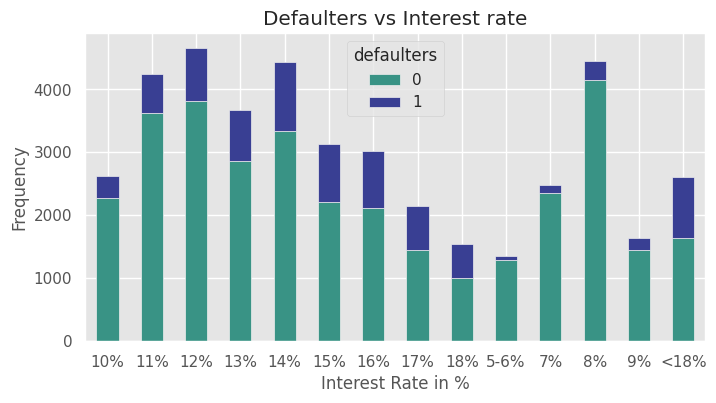

In [ ]:
pd.crosstab(data.int_rate ,data.defaulters ).plot(kind="bar", stacked=True, figsize=(8,4), color=['#399385','#393f93','#f64f59','#12c2e9'])
plt.title('Defaulters vs Interest rate')
plt.xlabel('Interest Rate in %')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

**Obs**: Even if we have imbalanced data people with higher interest rate tends to fall under defaulter category

###  3. Interest Rate V/S Grades

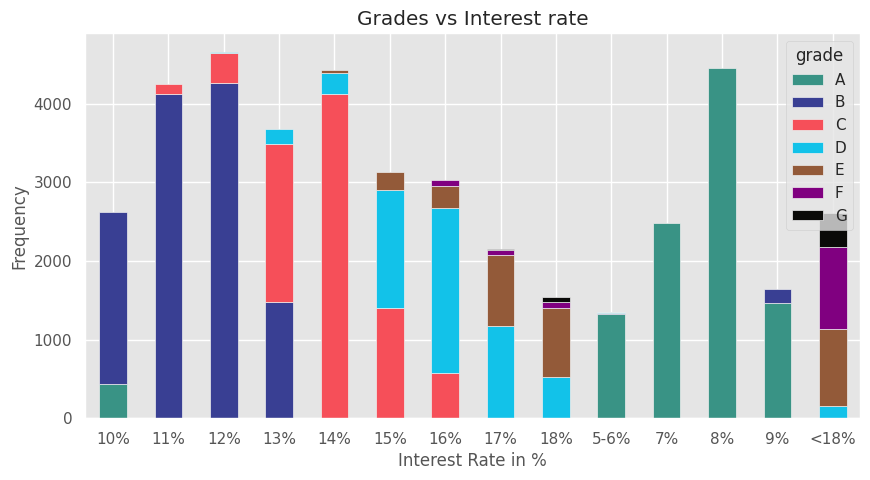

In [ ]:
pd.crosstab(data.int_rate ,data.grade ).plot(kind="bar", stacked=True, figsize=(10,5), color=['#399385','#393f93','#f64f59','#12c2e9','#935a39','#800080','#0a0a08'])
plt.title('Grades vs Interest rate')
plt.xlabel('Interest Rate in %')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Analysis:
- Interest rate between 5-9 falls under A grade
- Interest rate between 10-12 falls under B grade
- Interest rate between 13-16 falls under C & D grade
- Interest rate greater than 17 has the risk of comming under Defaulters category i.e. Grade F&G

## 3.2 Numerical Data Analysis

In [ ]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

for feature in numerical_features:
    print('Unique numerical_features values in each feature are :',feature,'=',len(data[feature].unique()))

Unique numerical_features values in each feature are : member_id = 42023
Unique numerical_features values in each feature are : loan_amnt = 890
Unique numerical_features values in each feature are : funded_amnt = 1045
Unique numerical_features values in each feature are : funded_amnt_inv = 9203
Unique numerical_features values in each feature are : installment = 16308
Unique numerical_features values in each feature are : annual_inc = 5563
Unique numerical_features values in each feature are : dti = 2888
Unique numerical_features values in each feature are : delinq_2yrs = 13
Unique numerical_features values in each feature are : fico_range_low = 45
Unique numerical_features values in each feature are : fico_range_high = 45
Unique numerical_features values in each feature are : inq_last_6mths = 29
Unique numerical_features values in each feature are : open_acc = 45
Unique numerical_features values in each feature are : pub_rec = 7
Unique numerical_features values in each feature are : r

## 3.2.1 Univariate Analysis on Numerical features

### 1. Loan Amount in $

Text(0, 0.5, 'Count')

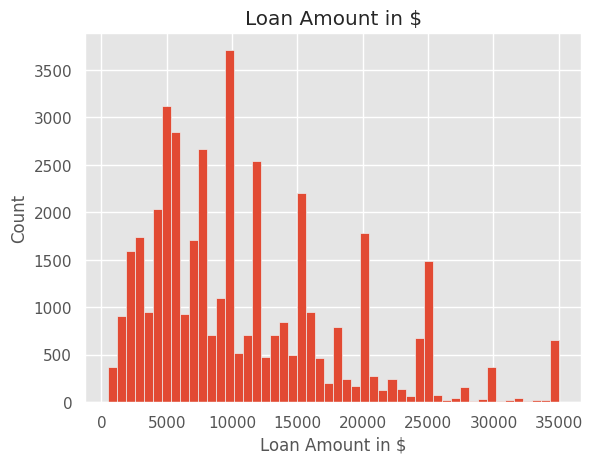

In [ ]:
#data['loan_amnt'].hist()
fig = data.loan_amnt.hist(bins = 50)
fig.set_title('Loan Amount in $')
fig.set_xlabel('Loan Amount in $')
fig.set_ylabel('Count')

In [ ]:
data[['loan_amnt','grade','defaulters']][data['loan_amnt']>= 35000].sample(5)

,loan_amnt,grade,defaulters
6704,35000.0,B,0
4717,35000.0,E,1
18717,35000.0,E,1
3150,35000.0,F,0
759,35000.0,C,0


### 2. Loan Amount V/S Funded Amount V/S Total payment recieved

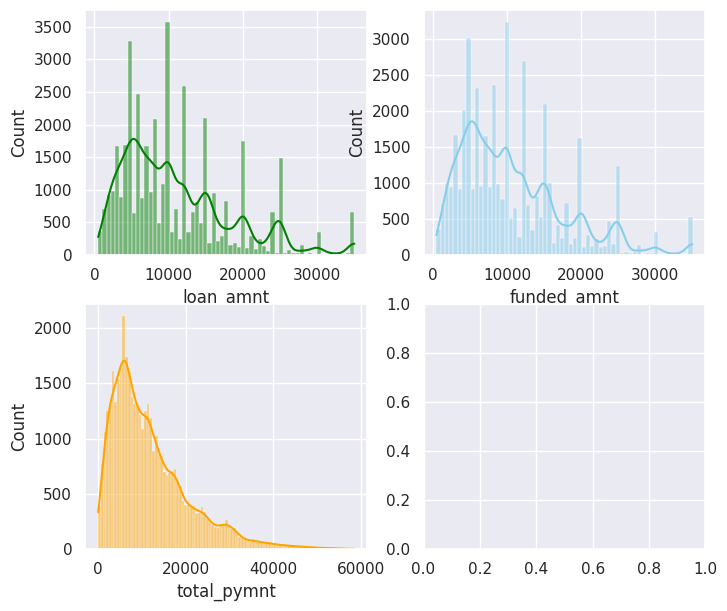

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(8, 7))

sns.histplot(data=data, x="loan_amnt", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=data, x="funded_amnt", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=data, x="total_pymnt", kde=True, ax=axs[1, 0], color='orange');

In [ ]:
data[['loan_amnt','funded_amnt','total_pymnt','grade','int_rate','defaulters']][data['total_pymnt']> 55000].sample(2)

,loan_amnt,funded_amnt,total_pymnt,grade,int_rate,defaulters
12961,35000.0,35000.0,56662.589938,F,<18%,0
10639,35000.0,35000.0,58480.139915,G,<18%,0


In [ ]:
data[['loan_amnt','funded_amnt','total_pymnt','grade','int_rate','defaulters']][data['defaulters']== 1].sample(2)

,loan_amnt,funded_amnt,total_pymnt,grade,int_rate,defaulters
3760,6850.0,6850.0,3834.49,B,11%,1
41621,3000.0,3000.0,832.59,E,15%,1


Those who paid total_payment > 5500 on total_interest rate < 18% falls under G grade category but they have closed their loan anyhow so they are not inside default category

### 3.Funded Amount V/S Funded Amnt Inv


In [ ]:
print('funded_amnt:',data['funded_amnt'].describe())

print("*"*50)

print('funded_amnt_inv',data['funded_amnt_inv'].describe())

funded_amnt: count    42025.000000
mean     10735.310076
std       7083.183848
min        500.000000
25%       5000.000000
50%       9450.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64
**************************************************
funded_amnt_inv count    42025.000000
mean     10046.288795
std       7060.721714
min          0.000000
25%       4925.000000
50%       8400.000000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64


Both variables must be highly co-related features can be further dropped

### 4. Fico range scores

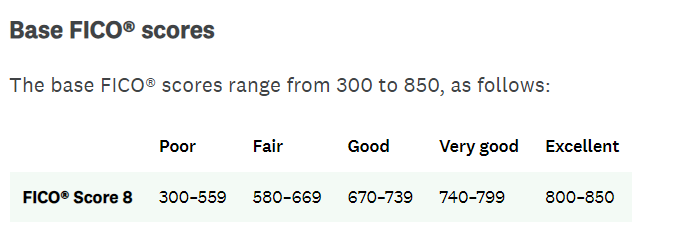

<Axes: xlabel='last_fico_range_high', ylabel='Count'>

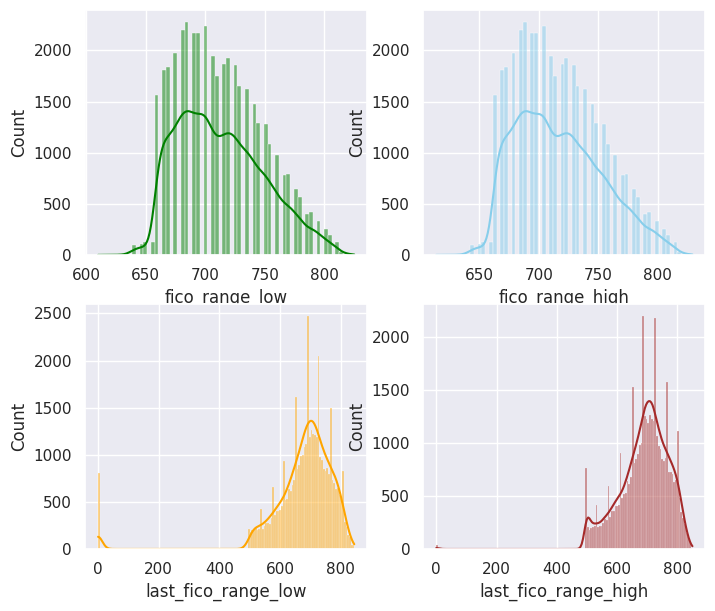

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(8, 7))

sns.histplot(data=data, x="fico_range_low", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=data, x="fico_range_high", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=data, x="last_fico_range_low", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=data, x="last_fico_range_high", kde=True, ax=axs[1, 1], color='brown')

## 4. Handle Outliers

### 1. Annual Income

<Axes: >

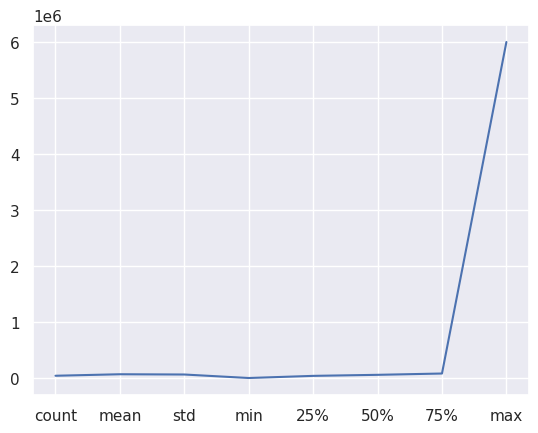

In [ ]:
data.annual_inc.describe().plot()

In [ ]:
data['annual_inc'].describe()

count    4.202500e+04
mean     6.905678e+04
std      6.430567e+04
min      1.896000e+03
25%      4.000000e+04
50%      5.865600e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [ ]:
IQR = data.annual_inc.quantile(0.75) - data.annual_inc.quantile(0.25)
lower_bridge = data.annual_inc.quantile(0.25) - (IQR*1.5)
UPPER_bridge = data.annual_inc.quantile(0.75) + (IQR*1.5)

print(IQR)
print(lower_bridge)
print(UPPER_bridge)

data.loc[data['annual_inc']>=145000.0,'annual_inc'] = 150000

42000.0
-23000.0
145000.0


Text(0, 0.5, 'Count')

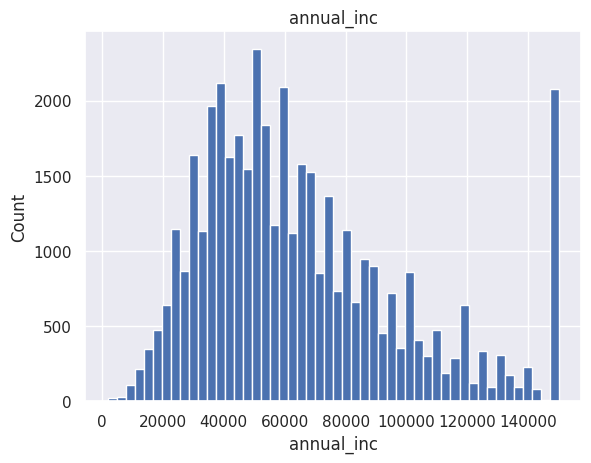

In [ ]:
fig = data.annual_inc.hist(bins = 50)
fig.set_title('annual_inc')
fig.set_xlabel('annual_inc')
fig.set_ylabel('Count')

In [ ]:
data.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
       'policy_code', 'acc_now_delinq', 'delinq_amnt', 'term', 'int_rate',
       'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_credit_pull_d', 'application_type', 'defaulters',
       'pub_rec_bankruptcies_mean', 'pub_rec_bankruptcies_end_distribution',
       'emp_length_', 'emp_title_', 'revol_util%', 'last_pymnt_m',
       'last_pymnt_y

In [ ]:
# data.to_csv('data.csv',index = 'False')